## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [1]:
import util
import matplotlib
import random
import math
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [2]:
def recursive_fib(n):
    return n if n < 2 else recursive_fib(n - 1) + recursive_fib(n - 2)

Проверьте, что функция работает корректно:

In [3]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [4]:
def recursive_fib_with_cache(n, cache=None):
    cache = cache or ([0, 1] + [-1] * (n - 1))
    if cache[n] == -1:
        cache[n] = recursive_fib_with_cache(n - 1, cache) + recursive_fib_with_cache(n - 2, cache)

    return cache[n]

Убедитесь, что функция работает корректно:

In [5]:
assert recursive_fib_with_cache(0) == 0
assert recursive_fib_with_cache(1) == 1
assert recursive_fib_with_cache(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [6]:
def fib(n):
    if n < 2:
        return n

    a = 1
    b = 1

    for i in range(2, n + 1):
        a, b = b, a + b

    return a

Проверьте правильность реализации:

In [7]:
assert fib(0) == 0
assert fib(1) == 1
assert fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

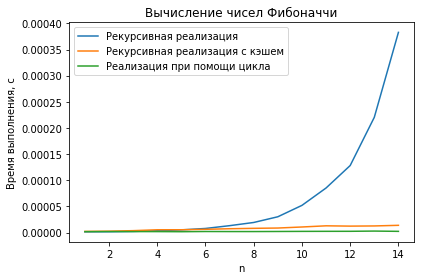

In [8]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [9]:
def bubble_sort(a):
    n = len(a)
    for i in range(n - 1):
        for j in range(n - 1 - i):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]

Убедитесь, что сортировка написана верно:

In [10]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [11]:
def bubble_sort_adaptive(a):
    n = len(a)
    for i in range(n - 1):
        swapped = False
        for j in range(n - 1 - i):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
        if not swapped:
            break

Проверьте свою реализацию:

In [12]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

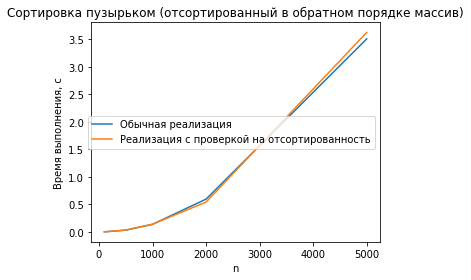

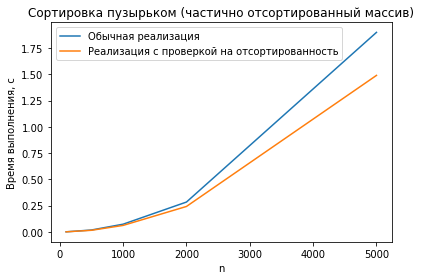

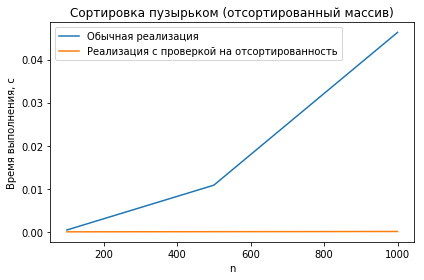

In [13]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [14]:
def quick_sort_first(a):
    if len(a) <= 1:
        return

    pivot = a[0]

    l = []
    m = []
    r = []

    for x in a:
        if x < pivot:
            l.append(x)
        elif x > pivot:
            r.append(x)
        else:
            m.append(x)

    quick_sort_first(l)
    quick_sort_first(r)

    for i, x in enumerate(l + m + r):
        a[i] = x

Проверьте свою реализацию:

In [15]:
a = [5, 4, 3, 2, 1]
quick_sort_first(a)
assert util.is_sorted(a)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [16]:
def quick_sort_middle(a):
    if len(a) <= 1:
        return

    pivot = a[len(a) // 2]

    l = []
    m = []
    r = []

    for x in a:
        if x < pivot:
            l.append(x)
        elif x > pivot:
            r.append(x)
        else:
            m.append(x)

    quick_sort_middle(l)
    quick_sort_middle(r)

    for i, x in enumerate(l + m + r):
        a[i] = x

Проверяем реализацию:

In [17]:
a = [5, 4, 3, 2, 1]
quick_sort_middle(a)
assert util.is_sorted(a)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [18]:
def quick_sort_random(a):
    if len(a) <= 1:
        return

    pivot = random.choice(a)

    l = []
    m = []
    r = []

    for x in a:
        if x < pivot:
            l.append(x)
        elif x > pivot:
            r.append(x)
        else:
            m.append(x)

    quick_sort_middle(l)
    quick_sort_middle(r)

    for i, x in enumerate(l + m + r):
        a[i] = x

Проверяем реализацию:

In [19]:
a = [5, 4, 3, 2, 1]
quick_sort_random(a)
assert util.is_sorted(a)

Сравним скорости работы трёх реализаций на различных входных данных:

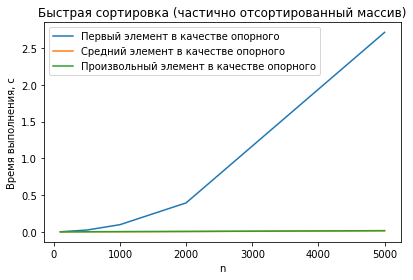

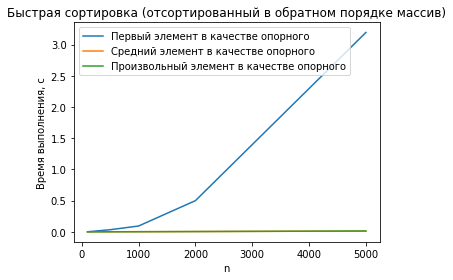

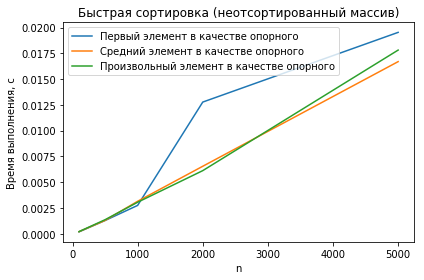

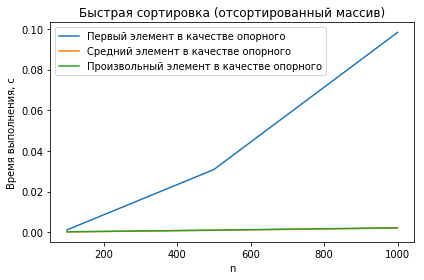

In [20]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [21]:
def merge(a, b):
    l1 = len(a)
    l2 = len(b)

    i1 = 0
    i2 = 0
    i3 = 0

    c = [0] * (l1 + l2)

    while i1 < l1 and i2 < l2:
        if a[i1] < b[i2]:
            c[i3] = a[i1]
            i3 += 1
            i1 += 1
        else:
            c[i3] = b[i2]
            i3 += 1
            i2 += 1

    while i1 < l1:
        c[i3] = a[i1]
        i3 += 1
        i1 += 1

    while i2 < l2:
        c[i3] = b[i2]
        i3 += 1
        i2 += 1

    return c


def merge_sort(a):
    l = len(a)
    if l <= 1:
        return

    b = list(a[:l // 2])
    c = list(a[l // 2:])

    merge_sort(b)
    merge_sort(c)

    for i, x in enumerate(merge(b, c)):
        a[i] = x

Проверьте корректность реализации:

In [22]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

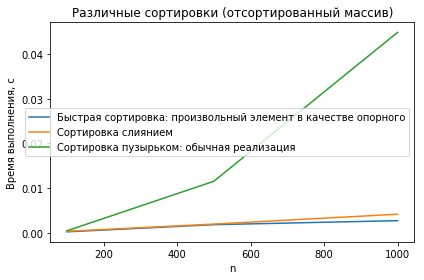

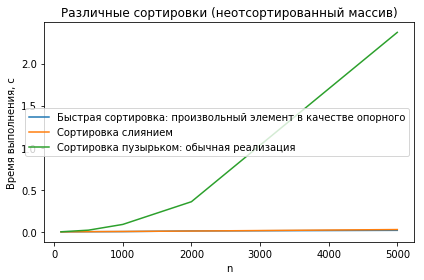

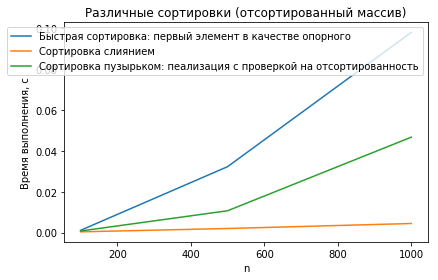

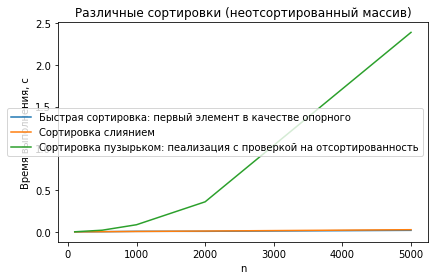

In [23]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [2]:
def search(a, x):
    for i, z in enumerate(a):
        if z == x:
            return i

Проверьте корректность реализации:

In [3]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [4]:
def binary_search(a, x):
    l = 0
    r = len(a)-1
    
    while l != r:
        m = (l + r) // 2
        if x == a[m]:
            return m
        elif x > a[m]:
            l = m + 1
        else:
            r = m-1
            
    return l

Проверьте корректность реализации:

In [5]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [6]:
def interpolation_search(a, x):
    l = 0
    r = len(a)-1
    
    while l != r:
        m = math.ceil(l + (x - a[l]) / (a[r]-a[l]) * (r - l))
        if x == a[m]:
            return m
        elif x > a[m]:
            l = m + 1
        else:
            r = m-1
            
    return l

Проверьте свою реализацию:

In [7]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

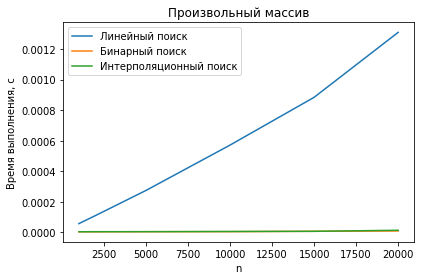

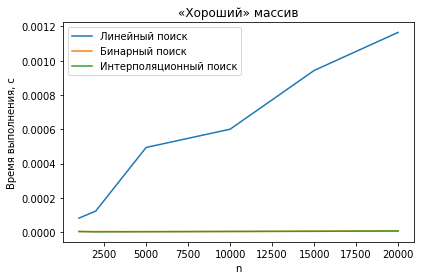

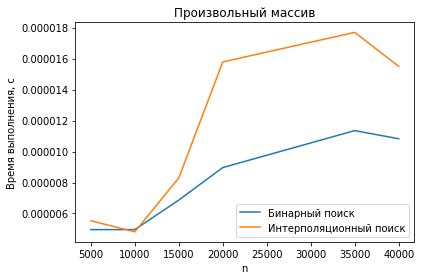

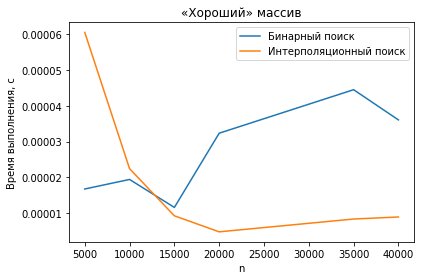

In [8]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.